In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import xgboost
from xgboost.sklearn import XGBRegressor
import seaborn as sns
import joblib
import os

In [101]:
random_state = 69
save_path = './models'

In [3]:
data_train= pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')

In [3]:
data_train.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score,Tags,Hotel_Nation,Negative_Review_Nouns,Positive_Review_Nouns,...,Customer_Location,Customer_Service,Customer_Room,Customer_F&A,Customer_Meal,trip_type,room_type,travel_type,stayed_time,room_size
0,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,empty,The staff are so friendly and helpful,10.0,"leisure trip , solo traveler , superior quee...",UK,empty,staff,...,0.00,1.0000,0.0,0.000,0.0000,1,5,1,2,6
1,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,Sadly the day of my presentation the woman on...,The room and location were absolutely brillia...,9.6,"business trip , solo traveler , superior que...",UK,day presentation woman desk note inbox driver ...,room location staff way bit bathroom snob touc...,...,0.40,0.0000,0.2,0.200,0.2000,0,5,1,6,6
2,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,empty,The whole experience from start to finish was...,10.0,"leisure trip , couple , deluxe king room , ...",UK,empty,experience start finish service none room brea...,...,0.00,0.6000,0.2,0.000,0.2000,1,6,2,1,5
3,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,Still under renovation so building noise stil...,Breakfast amazing location perfect for west e...,8.3,"leisure trip , couple , deluxe king room , ...",UK,renovation building noise problem outside,breakfast location west end king road area,...,0.50,-0.2500,0.0,0.000,0.2500,1,6,2,1,5
4,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,The renovations were still on going and I tho...,Staff amazing very helpful and couldn t have ...,7.1,"leisure trip , group , superior queen room ,...",UK,renovation december january sound drilling bre...,staff,...,-0.25,-0.0625,-0.5,-0.125,-0.0625,1,5,3,2,6


In [4]:
drop_feats = ["Hotel_Address", "Hotel_Name", "Negative_Review", "Positive_Review",
              "Tags", "Hotel_Nation", "Negative_Review_Nouns", "Positive_Review_Nouns", "Reviewer_Score"]
x_train = data_train.drop(columns=drop_feats)
y_train = data_train['Reviewer_Score']
x_test = data_test.drop(columns=drop_feats)
y_test = data_test['Reviewer_Score']

In [53]:
x_train_baseline = data_train["Average_Score"].to_numpy().reshape(-1, 1)
x_test_baseline = data_test["Average_Score"].to_numpy().reshape(-1, 1)

In [5]:
def score(y_true, y_pred):
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  mae =  mean_absolute_error(y_true, y_pred)

  print(f'Root Mean Squared Error: {rmse}')
  print(f'Mean Abosolute Error: {mae}')

In [71]:
linear_baseline = LinearRegression()

linear_baseline.fit(x_train_baseline, y_train)
y_pred_baseline = linear_baseline.predict(x_test_baseline)
score(y_test, y_pred_baseline)

Root Mean Squared Error: 1.5251887542414575
Mean Abosolute Error: 1.1837702751470232


In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# LINEAR REGRESSION

In [19]:
model_linear = LinearRegression()

model_linear.fit(x_train, y_train)
y_pred = model_linear.predict(x_test)
score(y_test, y_pred)

Root Mean Squared Error: 1.2935332435592957
Mean Abosolute Error: 0.9707051544860628


# SUPPORT VECTOR REGRESSION

In [32]:
linearsvr = LinearSVR(dual= "auto", random_state=random_state, tol=1e-3)
linearsvr.fit(x_train_scaled, y_train)
y_pred = linearsvr.predict(x_test_scaled)
score(y_test, y_pred)

Root Mean Squared Error: 1.3067213453712692
Mean Abosolute Error: 0.9587736757397463


In [33]:
n = 100000
model_svr2 = SVR(kernel='rbf')
model_svr2.fit(x_train_scaled[:n], y_train[:n])
y_pred = model_svr2.predict(x_test_scaled)
score(y_test, y_pred)

Root Mean Squared Error: 1.2882986632142899
Mean Abosolute Error: 0.9320580089349922


# RANDOM FOREST REGRESSION

In [7]:
paremeter = {"n_estimators": [10, 50, 100], "max_depth": [10, 15, 20]}
rfr = RandomForestRegressor(random_state=random_state)
gcsv = GridSearchCV(rfr, paremeter)
gcsv.fit(x_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=69),
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [10, 50, 100]})

In [13]:
gcsv.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [15]:
model_rdr = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state=random_state)
model_rdr.fit(x_train_scaled, y_train)

y_pred = model_rdr.predict(x_test_scaled)
score(y_test, y_pred)

Root Mean Squared Error: 1.2534349977462063
Mean Abosolute Error: 0.9357895146804387


# XGBRegressor

In [43]:
paremeter = {"n_estimators": [10, 50, 100, 300, 400, 500, 800],
              "max_depth": [3, 5, 7, 10],
              "learning_rate": [0.05, 0.1, 0.2, 0.3],
              "min_child_weight": [1, 10, 20, 50, 100]}
xgbr = XGBRegressor()
gscv = GridSearchCV(xgbr, paremeter)
gscv.fit(x_train_scaled, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 10, 20, 50, 100],
                         'n_estimators': [10, 50, 100, 300, 400, 500, 800]})

In [49]:
y_pred = gscv.best_estimator_.predict((x_test_scaled))
score(y_test, y_pred)

Root Mean Squared Error: 1.24180412685802
Mean Abosolute Error: 0.9254499848998802


In [64]:
def score_diff(y_true, y_pred, title):
  ftr = np.abs(np.subtract(y_true, y_pred))
  _, _, bars = plt.hist(ftr, bins= np.arange(10))
  plt.title(title)
  plt.xticks(np.arange(10))
  plt.bar_label(bars)

# Difference between reviewer score and predict score 

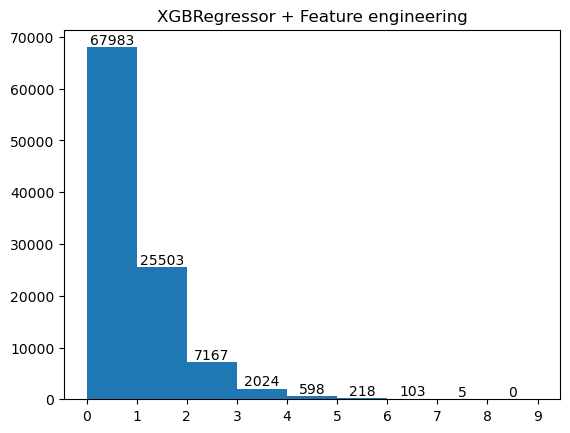

In [65]:
score_diff(y_test, y_pred, "XGBRegressor + Feature engineering")

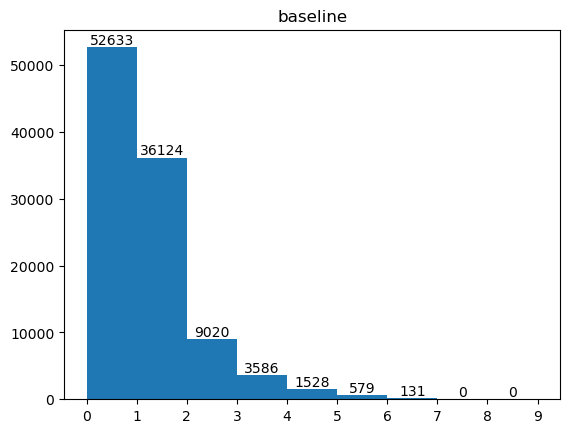

In [72]:
score_diff(y_test, y_pred_baseline, "baseline")

# Wrong prediction analysis

In [73]:
display = ftr = np.abs(np.subtract(y_test, y_pred)).copy()
display[ftr<4] = 0
test = np.flatnonzero(display)
test

array([   113,    479,    730,    899,   1234,   1383,   1466,   1473,
         1616,   1715,   1743,   2011,   2134,   2416,   2425,   3629,
         4043,   4106,   4168,   4369,   4401,   4497,   4543,   4654,
         4979,   5052,   5197,   5226,   5311,   5459,   5480,   5568,
         5715,   5831,   5841,   5971,   6005,   6008,   6139,   6235,
         6449,   6866,   6964,   6973,   7153,   7339,   7546,   7558,
         7709,   7838,   7859,   7876,   8089,   8202,   8235,   8291,
         8425,   8464,   8584,   8707,   8740,   8743,   8922,   8954,
         9031,   9132,   9311,   9523,   9578,   9820,  10032,  10124,
        10142,  10158,  10202,  10340,  10372,  10618,  10652,  10708,
        10709,  10735,  11001,  11242,  11246,  11260,  11315,  11486,
        11547,  11708,  11800,  11891,  12042,  12057,  12175,  12269,
        12294,  12312,  12379,  12387,  12476,  12557,  12604,  12942,
        13163,  13221,  13344,  13372,  13528,  13544,  13619,  13654,
      

In [74]:
wrong = data_test.iloc[test]
wrong

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score,Tags,Hotel_Nation,Negative_Review_Nouns,Positive_Review_Nouns,...,Customer_Location,Customer_Service,Customer_Room,Customer_F&A,Customer_Meal,trip_type,room_type,travel_type,stayed_time,room_size
113,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,8.8,25hours Hotel beim MuseumsQuartier,You guys are really rude You try to take adva...,empty,2.5,"leisure trip , family with older children , ...",Austria,guy advantage breakfast breakfast euro person ...,empty,...,-0.266667,-0.466667,0.000000,0.000000,-0.266667,1,1,4,2,2
479,Passeig de Sant Antoni 36 40 Sants Montju c 08...,8.0,AC Hotel Sants a Marriott Lifestyle Hotel,The noisy hotel and unfriendly staff,It is good if you are travelling by train But...,4.6,"leisure trip , family with older children , ...",Spain,hotel staff,train staff receptionist phone call customer s...,...,0.000000,0.750000,0.000000,0.250000,0.000000,1,0,4,1,2
730,32 rue des Saints P res 7th arr 75007 Paris Fr...,9.0,Acad mie H tel Saint Germain,empty,Very charming and helpful receptionists beaut...,2.5,"leisure trip , solo traveler , standard room...",France,empty,room position boulevard saint place,...,0.666667,0.000000,0.333333,0.000000,0.000000,1,1,1,1,0
899,Villarroel 106 Eixample 08011 Barcelona Spain,7.8,Acevi Villarroel,Nothing good this isn t a 4 stars hotel at al...,empty,2.5,"leisure trip , family with young children , ...",Spain,nothing star hotel value money night breakfast...,empty,...,-0.333333,-0.333333,0.000000,-0.166667,-0.166667,1,0,4,1,2
1234,Vijzelstraat 49 Amsterdam City Center 1017 HE ...,8.2,Albus Hotel Amsterdam City Centre,I got money stolen from my room Woken up ever...,Not a lot,2.5,"leisure trip , group , deluxe twin room sout...",Netherlands,money room morning staff room room,lot,...,0.000000,-0.400000,-0.600000,0.000000,0.000000,1,6,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102983,6 Holywell Lane Hackney London EC2A 3ET UK,9.1,citizenM London Shoreditch,Very very disappointed we had to pay for an e...,empty,2.9,"business trip , group , double room , staye...",UK,night check time com hotel,empty,...,-0.333333,-0.666667,0.000000,0.000000,0.000000,0,0,3,2,2
103164,40 trinity square City of London London EC3N 4...,9.1,citizenM Tower of London,Everything If you are a traditional person li...,Very high tec hotel The room is all controlle...,5.4,"business trip , solo traveler , single room ...",UK,everything person spoon morning coffee stick h...,hotel room lobby reception self service touch ...,...,0.125000,0.250000,0.500000,0.125000,0.000000,0,0,1,2,1
103306,40 trinity square City of London London EC3N 4...,9.1,citizenM Tower of London,the room stay is for disablility that sink is...,empty,3.8,"leisure trip , solo traveler , double room ,...",UK,room sink kind room,empty,...,0.000000,0.000000,-1.000000,0.000000,0.000000,1,0,1,3,2
103454,40 trinity square City of London London EC3N 4...,9.1,citizenM Tower of London,empty,Satisfied,4.2,"leisure trip , couple , double room , staye...",UK,empty,empty,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,2,1,2


In [100]:
idx = 103583
print(f"Positive: {wrong['Positive_Review'][idx]}")
print(f"Negative: {wrong['Negative_Review'][idx]}")
print(f"Predict score: {y_pred[idx]}")
print(f"True score: {y_test[idx]}")

Positive:  The hotels is very bad no verg air ice no cooler is
Negative: empty
Predict score: 9.199039459228516
True score: 2.9


# Save model

In [102]:
model_file_path = os.path.join(save_path, 'xgb_suggestion.joblib')
joblib.dump(gscv, model_file_path)
print(f'Mô hình đã được lưu vào: {model_file_path}')

Mô hình đã được lưu vào: ./models\xgb_suggestion.joblib
